In [1]:
import os
import numpy as np
import imageio
from livelossplot import PlotLosses
import matplotlib.pyplot as plt
from phase_image import PhaseImage
from tqdm.notebook import tqdm as tqdm

Dataset div2k


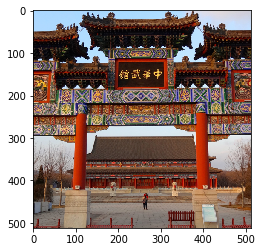

Dataset text


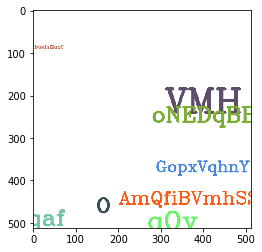

In [2]:
visualize = True #@param {type:"boolean"}

load_div2k = True #@param {type:"boolean"}
load_text = True #@param {type:"boolean"}

RES = 512

def load_dataset(filename, id):
    if not os.path.exists(filename):
        !gdown --id $id

    npz_data = np.load(filename)
    out = {
        "data_grid_search":npz_data['train_data'] / 255.,
        "data_test":npz_data['test_data'] / 255.,
    }
    return out

datasets = {}
if load_div2k:
    datasets['div2k'] = load_dataset('data_div2k.npz', '1TtwlEDArhOMoH18aUyjIMSZ3WODFmUab')
if load_text:
    datasets['text'] = load_dataset('data_2d_text.npz', '1V-RQJcMuk9GD4JCUn70o7nwQE0hEzHoT')

x1 = np.linspace(0, 1, RES//2+1)[:-1]
x_train = np.stack(np.meshgrid(x1,x1), axis=-1)

x1_t = np.linspace(0, 1, RES+1)[:-1]
x_test = np.stack(np.meshgrid(x1_t,x1_t), axis=-1)

def plot_dataset(dataset):
    plt.imshow(dataset['data_test'][0,:,:,:])
    plt.show()

if visualize:
    for dataset in datasets:
        print(f'Dataset {dataset}')
        plot_dataset(datasets[dataset])

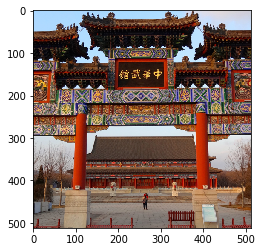

In [3]:
image = datasets['div2k']['data_test'][0,:,:,:]
plt.imshow(image)
plt.show()

## build neural fft image

In [4]:
import torch
torch.set_default_dtype(torch.float32)
phase_img=PhaseImage(image=image)

## init training

In [13]:
training_steps=100000
optimizer = torch.optim.Adam(
    phase_img.parameters(),
#     lr=0.0001,
    lr=1e-5,
    weight_decay=0,
)
image_gt=phase_img.img_ten

In [14]:
plotlosses_model = PlotLosses()
for i in tqdm(range(training_steps), desc='train iter', leave=False):
    image_out = phase_img()
    loss = 5 * torch.mean((torch.abs(image_out-image_gt)).sum(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%20==0:
#         torch.save(model_kspace.state_dict(), "./checkpoints/model_kspace.pth")
        plotlosses_model.update({'loss':loss.item()}, current_step=i)
        plotlosses_model.send()
        plt.imshow((image_out.detach().cpu().numpy()+1)/2)

KeyboardInterrupt: 

In [16]:
import cv2
import time
idx=0
for i in np.linspace(1,32,num=300):
    image=255*(phase_img.upsample(rate=i).detach().cpu().numpy()+1)/2
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    print(f"x{i}")
    cv2.imwrite("./results/x16/%05d.png"%(idx),image)
    idx+=1

x1.0
x1.1036789297658862
x1.2073578595317727
x1.3110367892976589
x1.414715719063545
x1.5183946488294313
x1.6220735785953178
x1.725752508361204
x1.8294314381270902
x1.9331103678929766
x2.0367892976588626
x2.140468227424749
x2.2441471571906355
x2.3478260869565215
x2.451505016722408
x2.5551839464882944
x2.6588628762541804
x2.762541806020067
x2.8662207357859533
x2.9698996655518393
x3.0735785953177257
x3.177257525083612
x3.280936454849498
x3.3846153846153846
x3.488294314381271
x3.591973244147157
x3.6956521739130435
x3.79933110367893
x3.903010033444816
x4.006688963210703
x4.110367892976589
x4.214046822742475
x4.317725752508361
x4.421404682274248
x4.525083612040134
x4.6287625418060205
x4.7324414715719065
x4.8361204013377925
x4.9397993311036785
x5.043478260869565
x5.147157190635451
x5.250836120401337
x5.354515050167224
x5.45819397993311
x5.561872909698996
x5.665551839464883
x5.769230769230769
x5.872909698996655
x5.976588628762542
x6.080267558528428
x6.183946488294314
x6.287625418060201
x6.3913

In [ ]:
torch.save(phase_img.state_dict(), "./checkpoints/model_kspace.pth")

In [ ]:
plt.imshow((phase_img(image_size=[2048,2048]).detach().cpu().numpy()+1)/2)

In [ ]:
int(i)